## Social Network

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

### Question 1 : simulation de p(x|theta)

On se place contrairement à pas mal d'articles dans le cadre de connection mutuelle (ami sur facebook) et non d'abonnement (twitter) => symétrie. Donc: theta = (poids sur le nb d'arrêtes, poids sur le nb de triangles et poids sur le nombre de quadrilatères).

In [34]:
def simu (M = 100, N = 10, theta = [0.2,0.1]):
    
    #initialisation avec lois bernoulli indépendantes de proba 1/2
    X = np.tril((np.random.uniform(0,1,[N,N]) >= 0.5)*1, -1)
    X = np.transpose(X) + X
    
    #boucle
    for k in range (M):
        for i in range(N):
            for j in range(i+1,N):
                X[i,j] = 1
                
                # permet de regarder qu'une fois les triangles : on compte nb de triangle et on enlève triangles où il y a
                # le coef i,j de X
                p = 1 / (1 + math.exp( -theta[0] - theta[1]*sum(X[i,:]*X[:,j]) ))
                
                X[i,j] = (random.random()<=p)*1
         
    return(np.triu(X, 1))


In [35]:
%time g = simu()

Wall time: 131 ms


In [36]:
g

array([[0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [37]:
np.sum(g)

35

In [38]:
np.sum(g.dot(g)*g)

55

### Question 2

Réalisation de 1000 simulations avec theta0 = [0.3, 0.1], et compilation des quantités d'intérêt : S (nb arrêtes) et T (nb triangles)

In [15]:
k = 1000
theta0 = [10,-10]
V = np.zeros(([k,2]))

for i in range(k):
    X = simu(theta = theta0)
    S = np.sum(X)
    T = np.sum(X.dot(X)*X)
    V[i,] = [S,T]

In [16]:
np.mean(V, axis = 0)

array([45.905, 11.178])

On calcule Z(theta)/Z(theta0)=E(exp((theta - theta0)T * S(x)))), puis à l'intérieur multiplié par S(x) puis S(x) carré, pour pouvoir s'en servir dans Newton-Raphson.

In [17]:
def Z(theta, valeurs = V):
    t = np.array([theta[0]-theta0[0], theta[1] - theta0[1]]) #les thetas sont des listes
    
    #espérance simple
    y1 = np.exp(valeurs.dot(t))
    
    #avec S(x)
    y2 = valeurs*(y1.reshape([k,1]).dot(np.ones([1,2]))) #multiplication terme à terme de valeurs par ... 
    
    #avec S(x)^2
    y3 = np.zeros([k,2,2])
    for i in range(len(valeurs)):
        a = V[i].reshape([1,2])
        y3[i] = np.transpose(a).dot(a)*y1[i]
    
    return([np.mean(y1), np.mean(y2, axis = 0), np.mean(y3, axis=0)])

Newton-Raphson : 

In [18]:
def pas(theta, observation = V[0]): #on prend une observation au pif
    a,b,c = Z(theta)
    b = b.reshape([2,1]) 
    l_deriv_2fois = np.linalg.inv(b.dot(np.transpose(b))/(a**2) - c/a)
    theta = np.array(theta).reshape([2,1])
    
    return(np.subtract(theta , l_deriv_2fois.dot(np.subtract(observation.reshape([2,1]), b/a))))

In [29]:
def NR(init = [10,-11], nb_iter = 10):
    #initialisation
    t = np.zeros([nb_iter,2])
    t[0] = init

    for i in range(nb_iter-1):
        t[i+1] = pas(t[i]).reshape([1,2])

    plt.plot(t[:,1])
    plt.plot(t[:,0])
    plt.show()
    return(t)

C:\Users\Hugues\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\Hugues\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\Hugues\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Hugues\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


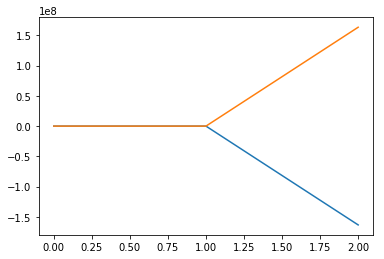

array([[ 1.00000000e+01, -1.10000000e+01],
       [ 1.01122131e+01, -6.65843560e+00],
       [ 1.63422438e+08, -1.63314338e+08],
       [            nan,             nan],
       [            nan,             nan],
       [            nan,             nan],
       [            nan,             nan],
       [            nan,             nan],
       [            nan,             nan],
       [            nan,             nan]])

In [30]:
NR()